# Lesson 2: Download data from Google Image

Go to image.google.com and download sea lion images 

Use Javascript codes to get urls of each images

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

 <img src="C:/Downloads/sea lion.jpg">

### Environment Setup

In [1]:
from fastai.vision import *

### Create a directory to upload url files into my server & Download images

In [65]:
classes = ['sealion','tiger','gorila']

In [59]:
folder = 'sealion'
file = 'urls_sealion.csv'

In [60]:
path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [61]:
download_images(path/file, dest, max_pics=200)

Error https://www.indianz.com/News/2018/08/16/sealioncolumbiariver.jpg HTTPSConnectionPool(host='www.indianz.com', port=443): Max retries exceeded with url: /News/2018/08/16/sealioncolumbiariver.jpg (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')")))
Error https://www.irishnews.com/picturesarchive/irishnews/irishnews/2018/09/26/222015868-d76000ea-9d89-4936-bdcb-26dc318b5f70.jpg HTTPSConnectionPool(host='www.irishnews.com', port=443): Max retries exceeded with url: /picturesarchive/irishnews/irishnews/2018/09/26/222015868-d76000ea-9d89-4936-bdcb-26dc318b5f70.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))


In [62]:
folder = 'tiger'
file = 'urls_tiger.csv'

In [63]:
path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [64]:
download_images(path/file, dest, max_pics=200)

Error https://www.washingtonpost.com/resizer/l05LZEx2-p20djfgIuZhfTnEWDM=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/XYTDN3BLZAI6TEDOTVK3MRI6WQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


In [56]:
folder = 'gorila'
file = 'urls_gorila.csv'

In [57]:
path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [58]:
download_images(path/file, dest, max_pics=200)

In [36]:
path.ls()

[PosixPath('data/animals/sealion'),
 PosixPath('data/animals/gorila'),
 PosixPath('data/animals/tiger')]

Upload url files to each folder

### Remove pictures that can't be opened

In [66]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

sealion


cannot identify image file <_io.BufferedReader name='data/animals/sealion/00000089.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/sealion/00000033.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/sealion/00000011.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/sealion/00000029.jpg'>
tiger


cannot identify image file <_io.BufferedReader name='data/animals/tiger/00000013.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/tiger/00000067.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/tiger/00000087.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/tiger/00000079.jpg'>
gorila


cannot identify image file <_io.BufferedReader name='data/animals/gorila/00000091.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/gorila/00000010.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/gorila/00000023.jpg'>
cannot identify image file <_io.BufferedReader name='data/animals/gorila/00000011.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/animals/gorila/00000084.jpg'>


### View the data

In [69]:
np.random.seed(7)
data = ImageDataBunch.from_folder(path, train ='.', valid_pct = 0.2,
                                 ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

- valid_pct : Use valid_pct to indicate the percentage of the total images to use as the validation set.
- ds_tfms : ds_tfms is a tuple of two lists of transforms to be applied to the training and the validation (plus test optionally) set.

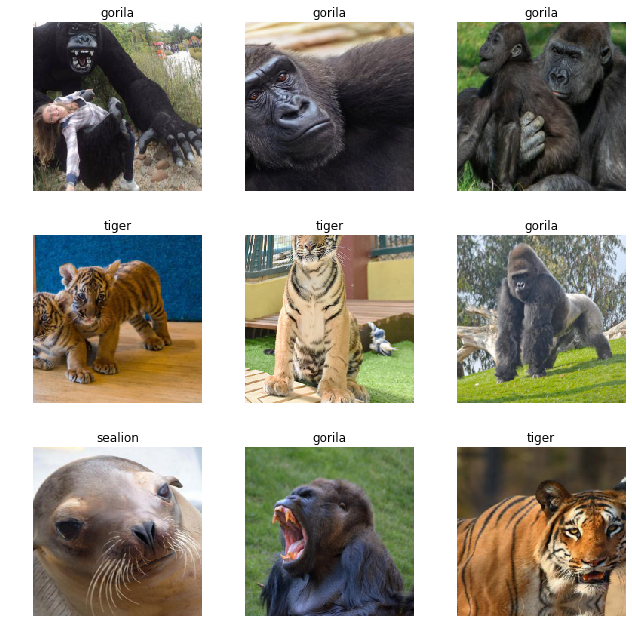

In [70]:
data.show_batch(rows=3, figsize=(9,9))

In [71]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gorila', 'sealion', 'tiger'], 3, 224, 56)

### Train the model

In [72]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [76]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [73]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.122224,0.824016,0.500000,00:09
1,0.638339,0.061705,0.000000,00:03
2,0.429002,0.015306,0.000000,00:03
3,0.322010,0.009799,0.000000,00:03


In [79]:
learn.save('stage-1')

In [80]:
learn.unfreeze()

In [81]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


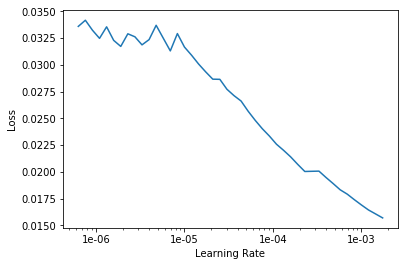

In [82]:
learn.recorder.plot()

In [83]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.063750,0.014360,0.000000,00:04
1,0.048764,0.010954,0.000000,00:03


In [84]:
learn.save('stage-2')

### Result

In [86]:
interp = ClassificationInterpretation.from_learner(learn)

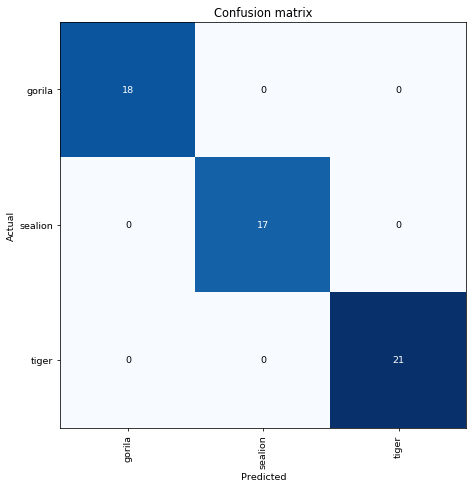

In [89]:
interp.plot_confusion_matrix(figsize=(7,7), dpi = 69)

In [91]:
# too low error rate because gorila, tiger and sea lion look sooooo different

The End